In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 CROPPING FACES OF TRAINING IMAGES OF INDIAN CELEBRITIES

In [2]:
# Prepairing Training Face Images By Detecting and Cropping the facing
import cv2
import os
import numpy as np

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

path="/content/drive/MyDrive/Dataset_AI/Train"
from glob import glob
folders=glob(path+'/*')
folders
paths="/content/drive/MyDrive/Dataset_AI/Train_Images"
for i in range(len(folders)):
  if(os.path.exists(paths+'/'+folders[i].split('/')[-1])):
    pass
  else:
    os.mkdir(paths+'/'+folders[i].split('/')[-1])

  for j in range(len(os.listdir(folders[i]))):
    if(os.path.exists(paths +'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j])):
      pass
    else:
      img=cv2.imread(path+'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j])
      faces = face_classifier.detectMultiScale(img, 1.3, 5)
      if faces is ():
        pass
      else:
        for (x,y,w,h) in faces:
          x=x-10
          y=y-10
          cropped_face = img[y:y+h+50, x:x+w+50]
          #save crop image with person name as image name 
          if x<0 or y<0 :
            pass
          else:
            print(paths +'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j])
            print(x)
            print(y)
            print(cropped_face)
            cv2.imwrite(paths +'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j],cropped_face)


CROPPING FACES OF TESTING IMAGES OF INDIAN CELEBRITIES

In [3]:
#Prepairing Testing Face Images By Detecting and Cropping the facing
import cv2
import os

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

path="/content/drive/MyDrive/Dataset_AI/Test"
from glob import glob
folders=glob(path+'/*')
folders
paths="/content/drive/MyDrive/Dataset_AI/Test_Images"
for i in range(len(folders)):
  if(os.path.exists(paths+'/'+folders[i].split('/')[-1])):
    pass
  else:
    os.mkdir(paths+'/'+folders[i].split('/')[-1])
  
  for j in range(len(os.listdir(folders[i]))):
    if(os.path.exists(paths +'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j])):
      pass
    else:
      img=cv2.imread(path+'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j])
      faces = face_classifier.detectMultiScale(img, 5)
      for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]
        #save crop image with person name as image name 
        if x<0 or y<0:
          pass
        else:
          cv2.imwrite(paths +'/'+folders[i].split('/')[-1]+'/'+os.listdir(folders[i])[j],cropped_face)

GENERATING OWN FACE DATASET 

In [4]:
# Used in Local Host To generate your own dataset

# import cv2
# import numpy as np
# import os


# # Unique name of the person
# name = str(input('Enter the name of the Person\n'))

# # Create a training folder with the name of the person
# directory_train = "/content/drive/MyDrive/Dataset_AI/Train_Images'
# directory_train = os.path.join(directory_train, name)
# if(os.path.exists(directory_train)):
#     pass
# else:
#     os.mkdir(directory_train)
    
# # Create a testing folder with the name of the person
# directory_test = "/content/drive/MyDrive/Dataset_AI/Test_Images"
# directory_test = os.path.join(directory_test, name)
# if(os.path.exists(directory_test)):
#     pass
# else:
#     os.mkdir(directory_test)

# # Load HAAR face classifier
# face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Dataset_AI/haarcascade_frontalface_default.xml')

# # Load functions
# def face_extractor(img):
#     # Function detects faces and returns the cropped face
#     # If no face detected, it returns the input image
    
#     #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
#     if faces is ():
#         return None
    
#     # Crop all faces found
#     for (x,y,w,h) in faces:
#         x=x-10
#         y=y-10
#         cropped_face = img[y:y+h+50, x:x+w+50]

#     return cropped_face

# # Initialize Webcam
# cap = cv2.VideoCapture('video.mp4')
# count = 0

# # Collect 350 samples of your face from webcam input
# # 250 for Training
# # 100 for Testing
# while True:

#     ret, frame = cap.read()
#     if face_extractor(frame) is not None:
#         count += 1
#         face = cv2.resize(face_extractor(frame), (400, 400))
#         #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
       
#         # Save file in specified directory with unique name
#         if count <= 250:
#             file_name_path = directory_train + '/' + str(count) + '.jpg'
#         elif count>250:
#             file_name_path = directory_test + '/' + str(count) + '.jpg'
            
#         cv2.imwrite(file_name_path, face)

#     if cv2.waitKey(1) == 13 or count == 200: #13 is the Enter Key
#         break
        
# cap.release()
# cv2.destroyAllWindows()      
# print("Collection Completed")

IMPORTING LIBRARIES

In [5]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from keras.layers import Flatten,Dense
from keras.preprocessing.image import image_dataset_from_directory
from keras.optimizers import Adam

In [6]:
IMG_SHAPE=[224,224]

APPLYING VGG16 MODEL (PRETRAINED TRANSFER LEARNING MODEL)

In [7]:
Vgg16=VGG16(include_top=False,weights='imagenet',input_shape=[224,224,3])

58900480/58889256 [==============================] - 1s 0us/step


In [8]:
Vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in Vgg16.layers:
    layer.trainable = False

In [10]:
x=Flatten()(Vgg16.output)

In [11]:
from glob import glob
folders=glob('/content/drive/MyDrive/Dataset_AI/Train_Images/*')
folders

['/content/drive/MyDrive/Dataset_AI/Train_Images/Aishwarya_Rai',
 '/content/drive/MyDrive/Dataset_AI/Train_Images/Abhishek_Bachchan',
 '/content/drive/MyDrive/Dataset_AI/Train_Images/Aamir_Khan',
 '/content/drive/MyDrive/Dataset_AI/Train_Images/Ajay_Devgn',
 '/content/drive/MyDrive/Dataset_AI/Train_Images/Akshay_Kumar']

In [12]:
len(folders)

5

In [13]:
x = Dense(1024, activation='relu')(x)  

In [14]:
prediction =Dense(len(folders),activation='softmax')(x)   
VGG16_model=Model(inputs=Vgg16.input,outputs=prediction)
VGG16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 40,410,949
Trainable params: 25,696,261
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
VGG16_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#Data preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale= 1./255, shear_range =0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_AI/Train_Images/',target_size =(224,224),batch_size=32, class_mode ='categorical')
testing_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_AI/Test_Images',target_size =(224,224),batch_size=32, class_mode ='categorical')

Found 436 images belonging to 5 classes.
Found 56 images belonging to 5 classes.


In [18]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
checkpoint=ModelCheckpoint("vgg19.h5",monitor="val_loss",mode='min',save_best_only=True,verbrose=1)
earlystop=EarlyStopping(monitor="val_loss",min_delta=0,patience=3,verbose=1,restore_best_weights=True)

In [19]:
history=VGG16_model.fit(training_set,validation_data=testing_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(testing_set))

Epoch 1/5
14/14 [==============================] - 353s 23s/step - loss: 13.5255 - accuracy: 0.2592 - val_loss: 4.5851 - val_accuracy: 0.4643
Epoch 2/5
14/14 [==============================] - 8s 592ms/step - loss: 2.4840 - accuracy: 0.4794 - val_loss: 0.9070 - val_accuracy: 0.6250
Epoch 3/5
14/14 [==============================] - 8s 587ms/step - loss: 0.7064 - accuracy: 0.7317 - val_loss: 0.4071 - val_accuracy: 0.8393
Epoch 4/5
14/14 [==============================] - 8s 587ms/step - loss: 0.3757 - accuracy: 0.8830 - val_loss: 0.3831 - val_accuracy: 0.8393
Epoch 5/5
14/14 [==============================] - 8s 588ms/step - loss: 0.2301 - accuracy: 0.9381 - val_loss: 0.3550 - val_accuracy: 0.8571


PLOTING GRAPHS BETWEEN TRAINING LOSS AND VALIDATION LOSS 

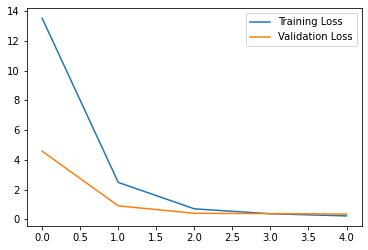

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.show()
plt.savefig('Loss_ValidLoss')

PLOTING GRAPHS BETWEEN TRAINING ACCURACY AND VALIDATION ACCURACY 

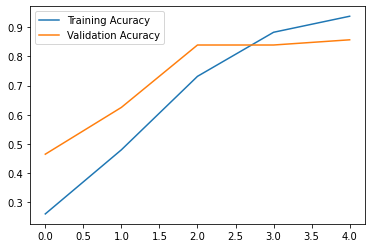

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training Acuracy")
plt.plot(history.history['val_accuracy'],label="Validation Acuracy")
plt.legend()
plt.show()
plt.savefig('Acc_ValidAcu')

SAVING MODEL

In [23]:
VGG16_model.save('VGG16_Face_Recognition.h5')

KeyError: ignored

EVALUATING MODEL ON TESTING SET

In [24]:
VGG16_model.evaluate(testing_set)

2/2 [==============================] - 1s 241ms/step - loss: 0.3550 - accuracy: 0.8571


[0.35504457354545593, 0.8571428656578064]

PREDICTION FACE IMAGES 

Aamir_Khan


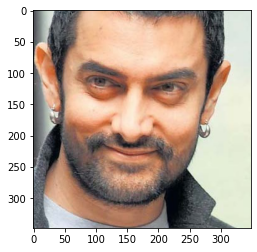

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img
import tensorflow as tf
from google.colab.patches import cv2_imshow
 
def process_image(image):
    image_size = 224
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image
def predict(image_path, model):
    
    image = Image.open(image_path)
    image_arr = np.asarray(image)
    plt.imshow(image_arr)
    processed_image = process_image(image_arr)
    processed_image = y = np.expand_dims(processed_image, axis=0)
    ps = model.predict(processed_image)
    prediction = ps[0]
    return prediction
url='/content/drive/MyDrive/Dataset_AI/Test_Images/Aamir_Khan/107.jpg'
img=load_img(url,target_size=(224,224))
plt.imshow(img)
t=np.argmax(predict(url,VGG16_model))
inv_map = {v: k for k, v in training_set.class_indices.items()}
print(inv_map[t])

PREDICTING IMAGES (FIRST BY CROPPING THE FACES AND PASSING IT TO THE MODEL)

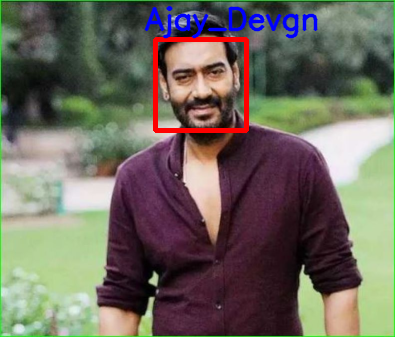

In [27]:
import cv2
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img , img_to_array
import numpy as np
inv_map = {v: k for k, v in training_set.class_indices.items()}
img_width , img_height = 224,224
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")


inv_map = {v: k for k, v in training_set.class_indices.items()}
font = cv2.FONT_HERSHEY_SIMPLEX
org = (1,1)
class_label = ''
fontScale = 1
color = (255,0,0)
thickness = 2


color_img = cv2.imread("/content/ajay.jpg")

scale = 50
width = int(color_img.shape[1]*scale /100)
height = int(color_img.shape[0]*scale/100)
dim = (width,height)

color_img = cv2.resize(color_img, dim ,interpolation= cv2.INTER_AREA)

gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray_img, 1.1, 6)

img_count = 0
for (x,y,w,h) in faces:
  org = (x-10,y-10)
  img_count += 1
  color_face = color_img[y:y+h,x:x+w]
  cv2.imwrite('input.jpg',color_face)
  img = load_img('input.jpg',target_size=(img_width,img_height))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  prediction = VGG16_model.predict(img)
  t=np.argmax(prediction)
  class_label=inv_map[t]
  cv2.rectangle(color_img,(x,y),(x+w,y+h),(0,0,255),3)
  cv2.putText(color_img, class_label, org, font ,fontScale, color, thickness,cv2.LINE_AA)
cv2_imshow(color_img)




PREDICTING FACES IN VIDEO FRAMES

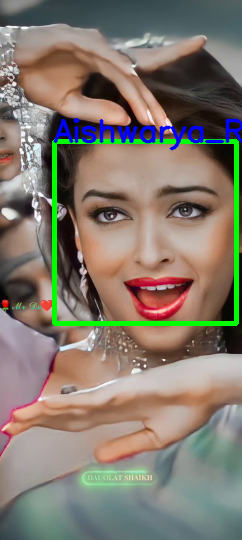

KeyboardInterrupt: ignored

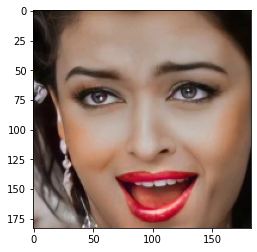

In [ ]:
import cv2
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img , img_to_array
import numpy as np

inv_map = {v: k for k, v in training_set.class_indices.items()}
img_width , img_height = 224,224
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Dataset_AI/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture('/content/video2.mp4.mp4')

img_count_full = 0
from IPython.display import clear_output, Image
import base64

def process_image(image):
    image_size = 224
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image
def predict(image_path, model):
    from PIL import Image
    image = Image.open(image_path)
    image_arr = np.asarray(image)
    plt.imshow(image_arr)
    processed_image = process_image(image_arr)
    processed_image = y = np.expand_dims(processed_image, axis=0)
    ps = model.predict(processed_image)
    prediction = ps[0]
    return prediction
    
font = cv2.FONT_HERSHEY_SIMPLEX
org = (1,1)
class_label = ''
fontScale = 1
color = (255,0,0)
thickness = 2


while True:
  img_count_full += 1
  response , color_img = cap.read()
  if response == False:
    break
  scale = 50
  width = int(color_img.shape[1]*scale /100)
  height = int(color_img.shape[0]*scale/100)
  dim = (width,height)
  color_img = cv2.resize(color_img, dim ,interpolation= cv2.INTER_AREA)
  gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray_img, 1.1, 6)
  img_count = 0
  for (x,y,w,h) in faces:
    org = (x,y)
    img_count += 1
    color_face = color_img[y:y+h,x:x+w]
    cv2.imwrite('face.jpg',color_face)
    # img = load_img('img1/face.jpg',target_size=(img_width,img_height))
    # img = img_to_array(img)
    # img = np.expand_dims(img,axis=0)
    t=np.argmax(predict('face.jpg',VGG16_model))
    class_label=inv_map[t]
    cv2.rectangle(color_img,(x,y),(x+w,y+h),(0,255,0),3)
    cv2.putText(color_img, class_label, org, font ,fontScale, color, thickness,cv2.LINE_AA)
    clear_output(wait=True)
    # img = arrayShow(color_img)
    #display(img)
    cv2_imshow(color_img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

